In [216]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [261]:
mizuho = pd.read_csv('8411_2019.csv', encoding='cp932', header=1)
mizuho.rename(columns=({'日付': 'day', '始値': 'start', '高値': 'high', '安値': 'low', '終値': 'end', '出来高': 'volume', '終値調整値': 'cpav'}), inplace=True)
mizuho

,day,start,high,low,end,volume,cpav
0,2019-01-04,166.6,170.9,166.5,170.6,124515100,170.6
1,2019-01-07,174.0,174.1,171.0,171.9,143772900,171.9
2,2019-01-08,172.5,174.8,172.4,172.4,143930800,172.4
3,2019-01-09,174.0,174.3,172.7,173.7,137029700,173.7
4,2019-01-10,173.1,174.3,172.6,173.3,140570900,173.3
...,...,...,...,...,...,...,...
236,2019-12-24,168.8,169.0,167.8,168.0,50037200,168.0
237,2019-12-25,167.7,168.2,167.3,167.4,40455900,167.4
238,2019-12-26,167.4,168.3,167.4,167.8,60307600,167.8
239,2019-12-27,168.4,169.5,168.3,169.0,66223500,169.0


In [262]:
# 相関係数
mizuho.corr()

,start,high,low,end,volume,cpav
start,1.000000,0.996581,0.997114,0.993561,0.226406,0.993561
high,0.996581,1.000000,0.996808,0.997693,0.251648,0.997693
low,0.997114,0.996808,1.000000,0.996657,0.206428,0.996657
end,0.993561,0.997693,0.996657,1.000000,0.233895,1.000000
volume,0.226406,0.251648,0.206428,0.233895,1.000000,0.233895
cpav,0.993561,0.997693,0.996657,1.000000,0.233895,1.000000


---

始値に関して、

*   平均
*   中央値
*   分散
*   標準偏差

を求める。



In [263]:
start = mizuho['start']
# 平均
start.mean()

165.92199170124474

In [264]:
# 中央値
start.median()

168.4

In [265]:
# 分散
start.var()

66.79680601659757

In [266]:
    # 標準偏差
start.std()

8.172931298903569



---

日毎の始値のグラフ

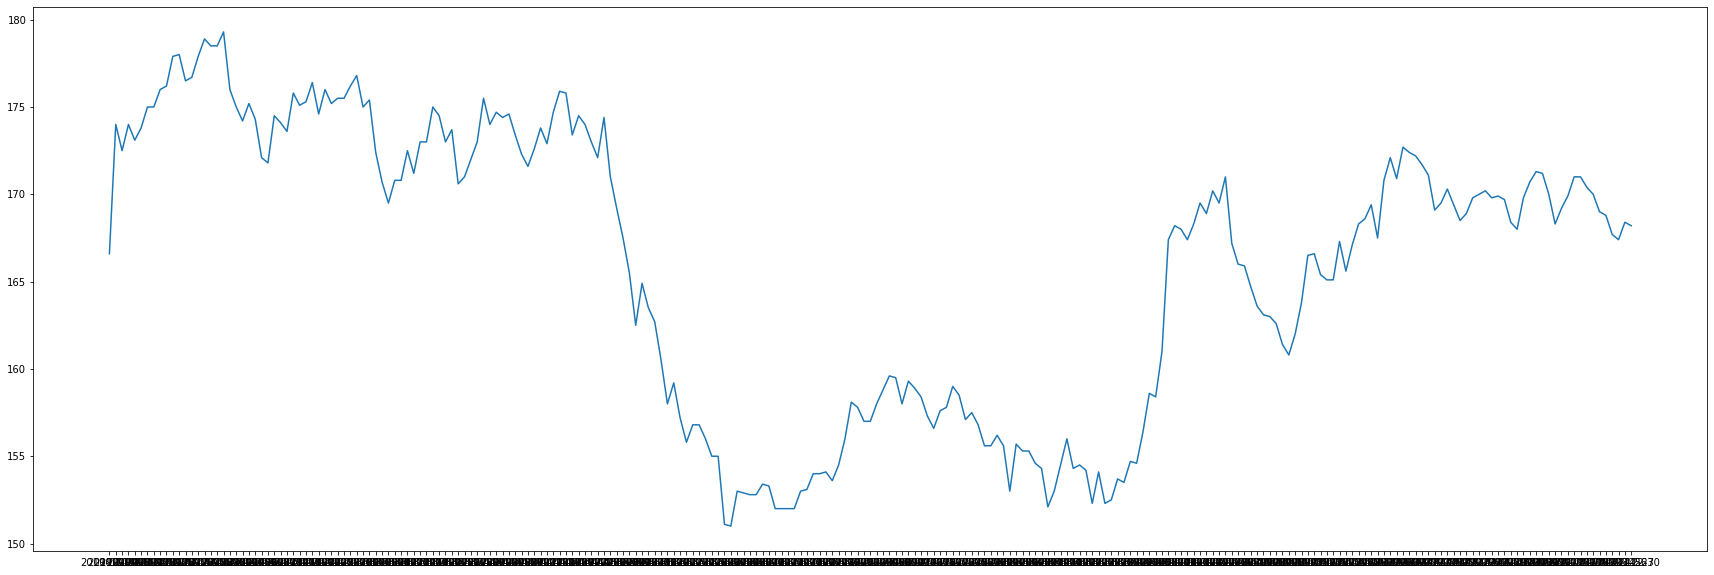

In [267]:
day = mizuho['day']
plt.figure(figsize=(30, 10))
plt.plot(day, start)



---

始値から、その日の株価の上下を推測する。

In [268]:
end = mizuho['end']
mizuho['result'] = end - start
mizuho

,day,start,high,low,end,volume,cpav,result
0,2019-01-04,166.6,170.9,166.5,170.6,124515100,170.6,4.0
1,2019-01-07,174.0,174.1,171.0,171.9,143772900,171.9,-2.1
2,2019-01-08,172.5,174.8,172.4,172.4,143930800,172.4,-0.1
3,2019-01-09,174.0,174.3,172.7,173.7,137029700,173.7,-0.3
4,2019-01-10,173.1,174.3,172.6,173.3,140570900,173.3,0.2
...,...,...,...,...,...,...,...,...
236,2019-12-24,168.8,169.0,167.8,168.0,50037200,168.0,-0.8
237,2019-12-25,167.7,168.2,167.3,167.4,40455900,167.4,-0.3
238,2019-12-26,167.4,168.3,167.4,167.8,60307600,167.8,0.4
239,2019-12-27,168.4,169.5,168.3,169.0,66223500,169.0,0.6


In [269]:
mask1 = mizuho['result'] > 0
mask2 = mizuho['result'] <= 0

In [270]:
mizuho.loc[mask1, 'result'] = 1
mizuho.loc[mask2, 'result'] = 0
mizuho

,day,start,high,low,end,volume,cpav,result
0,2019-01-04,166.6,170.9,166.5,170.6,124515100,170.6,1.0
1,2019-01-07,174.0,174.1,171.0,171.9,143772900,171.9,0.0
2,2019-01-08,172.5,174.8,172.4,172.4,143930800,172.4,0.0
3,2019-01-09,174.0,174.3,172.7,173.7,137029700,173.7,0.0
4,2019-01-10,173.1,174.3,172.6,173.3,140570900,173.3,1.0
...,...,...,...,...,...,...,...,...
236,2019-12-24,168.8,169.0,167.8,168.0,50037200,168.0,0.0
237,2019-12-25,167.7,168.2,167.3,167.4,40455900,167.4,0.0
238,2019-12-26,167.4,168.3,167.4,167.8,60307600,167.8,1.0
239,2019-12-27,168.4,169.5,168.3,169.0,66223500,169.0,1.0




---

下のグラフより、

1年間を通して始値より終値が上がった日は、

下がった日に比べて少ないと言える。

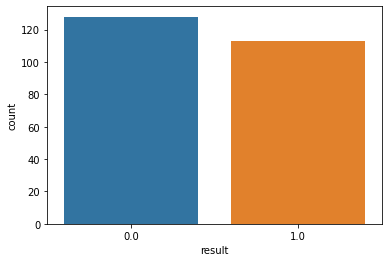

In [272]:
result = mizuho['result']
sns.countplot(x=result)



---



教師あり学習：分類　なので、

サポートベクトルマシンで実装してみる。

In [310]:
x = mizuho.drop(labels='result', axis=1).values
t = mizuho['result'].values

In [311]:
np.unique(t)

array([0., 1.])

In [312]:
x.shape, t.shape

((241, 6), (241,))

In [313]:
# ホールドアウト法(holdout method)
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

In [314]:
# モデルの定義
from sklearn.svm import SVC
svc = SVC(C=2.0)

In [315]:
# データの標準化
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [316]:
std_scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [317]:
x_train_std = std_scaler.transform(x_train)
x_test_std = std_scaler.transform(x_test)

In [318]:
round(x_train_std.mean()), round(x_train_std.std())

(-0.0, 1.0)

In [319]:
# モデルの学習
svc.fit(x_train_std, t_train)

SVC(C=2.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [320]:
# モデルの検証
print('train score:', svc.score(x_train_std, t_train))
print('test score:', svc.score(x_test_std, t_test))

train score: 0.6845238095238095
test score: 0.6164383561643836


In [321]:
# 推論
svc.predict(x_test_std)

array([1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0.])



---



---



決定木でも実装してみる。

In [322]:
# モデルの定義
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)

In [323]:
# モデルの学習
dtree.fit(x_train, t_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [324]:
# モデルの検証
print('train score:', dtree.score(x_train, t_train))
print('test score:', dtree.score(x_test, t_test))

train score: 1.0
test score: 0.6712328767123288


In [325]:
# 推論
dtree.predict(x_test)

array([0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 1.])

In [327]:
# ランダムサーチでハイパーパラメータ作成
from sklearn.model_selection import RandomizedSearchCV

In [354]:

# ハイパーパラメータを探索する範囲の指定
param_distributions = {
    'max_depth': list(range(5, 100, 2)),
    'min_samples_split': list(range(2, 50, 1))
}

# 試行回数の指定
n_iter = 1000

# K-分割交差検証のKの値(データセットの分割数)
cv = 6

In [355]:
# モデルの定義
tuned_model = RandomizedSearchCV(
    estimator=dtree,
    param_distributions=param_distributions,
    n_iter=n_iter, cv=cv,
    random_state=0, return_train_score=False
)

In [356]:
# モデルの学習
tuned_model.fit(x_train, t_train)

RandomizedSearchCV(cv=6, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=0,
             

In [357]:
# 学習結果(スコアの高い順)
pd.DataFrame(tuned_model.cv_results_).sort_values('rank_test_score').T

,166,34,401,578,131,247,45,251,48,252,769,256,619,753,623,111,109,726,352,287,68,102,913,96,658,674,316,82,90,690,775,972,773,558,843,473,175,470,467,457,...,359,621,156,681,839,915,196,204,336,691,610,667,365,865,728,141,282,399,397,453,574,576,646,232,319,83,347,508,554,876,333,779,502,971,413,206,307,320,553,731
mean_fit_time,0.00109299,0.00108858,0.00108731,0.00106287,0.00108401,0.00107129,0.00107996,0.001068,0.0011011,0.00106247,0.00113916,0.00105894,0.00108675,0.00111794,0.00107622,0.00109235,0.00110475,0.00108826,0.00111175,0.00106657,0.00108318,0.00109303,0.00110634,0.00113499,0.0010821,0.00110332,0.00106025,0.00111453,0.00109148,0.00106657,0.00142348,0.00108242,0.00110805,0.00105715,0.00108,0.00107014,0.00110904,0.00106283,0.00106359,0.00106649,...,0.000931541,0.000912905,0.000912746,0.000901659,0.000905871,0.000967701,0.00090158,0.000906905,0.000909209,0.000900507,0.000919223,0.00090607,0.000915289,0.000903169,0.000901699,0.000919342,0.000895063,0.000932693,0.000920812,0.000899871,0.000903765,0.000894745,0.000900984,0.00090301,0.000911991,0.000918349,0.000910362,0.000898123,0.000914375,0.00126966,0.000919422,0.000940084,0.000914653,0.000934482,0.000918587,0.000917514,0.000906507,0.00092415,0.00103533,0.000950456
std_fit_time,2.78609e-05,1.94529e-05,2.78208e-05,1.90033e-05,1.96849e-05,2.00856e-05,2.57987e-05,2.47484e-05,3.73386e-05,2.45901e-05,3.78155e-05,2.52719e-05,3.28457e-05,3.97726e-05,3.61328e-05,2.41669e-05,4.13974e-05,4.78738e-05,3.57355e-05,1.93911e-05,2.14817e-05,3.91049e-05,2.40648e-05,0.000120413,3.31269e-05,2.09793e-05,3.89343e-05,6.15994e-05,1.97954e-05,2.68983e-05,0.000169059,2.57319e-05,2.73246e-05,2.65691e-05,3.29163e-05,2.05284e-05,5.19839e-05,2.45264e-05,2.663e-05,1.96487e-05,...,5.7451e-05,5.13898e-05,4.03401e-05,3.06904e-05,3.11739e-05,7.79034e-05,3.9231e-05,3.53804e-05,3.74833e-05,3.87944e-05,5.47011e-05,3.7755e-05,3.61658e-05,2.7286e-05,3.9763e-05,3.75828e-05,3.41997e-05,2.95719e-05,4.03469e-05,3.53577e-05,3.86742e-05,3.61887e-05,2.98953e-05,3.89294e-05,4.04627e-05,3.58433e-05,3.67811e-05,3.19937e-05,3.60891e-05,7.18464e-05,3.98153e-05,3.2717e-05,3.6291e-05,4.58303e-05,4.33796e-05,1.53125e-05,6.24064e-06,1.51106e-05,0.000260294,7.71209e-05
mean_score_time,0.000291189,0.000294884,0.000282367,0.0002774,0.000285188,0.000287493,0.000298103,0.000279188,0.000290116,0.000278711,0.000311414,0.000274142,0.000288963,0.000300328,0.000282844,0.00029091,0.000303825,0.000306328,0.000287096,0.00028042,0.000294526,0.000291665,0.0003105,0.000290712,0.000287493,0.000299255,0.000274261,0.000298818,0.000292818,0.000284553,0.000408769,0.00029103,0.000305891,0.000284473,0.000285784,0.000289718,0.000326355,0.000276128,0.000276287,0.000279228,...,0.000288765,0.000277003,0.000289043,0.000279903,0.000271519,0.000308474,0.000284076,0.000284354,0.000287294,0.000270168,0.000288804,0.000276526,0.000290394,0.000321666,0.00028197,0.000286063,0.000273903,0.000292063,0.000291506,0.000287652,0.000271678,0.000277321,0.000282844,0.000278195,0.000285467,0.000291348,0.000287016,0.000276923,0.000283877,0.000458121,0.000285784,0.000296513,0.000284831,0.000304937,0.000282407,0.00028646,0.000273188,0.000288844,0.000297825,0.000279069
std_score_time,1.23929e-05,1.65853e-05,1.08733e-05,9.01352e-06,8.83588e-06,3.36064e-05,2.8106e-05,1.03532e-05,9.0854e-06,1.00117e-05,1.0461e-05,9.39302e-06,8.86862e-06,1.27234e-05,8.13268e-06,9.14465e-06,2.6752e-05,2.29491e-05,1.27447e-05,1.01903e-05,2.16876e-05,1.28464e-05,3.22655e-05,7.38157e-06,1.32699e-05,2.85132e-05,8.0519e-06,1.59899e-05,7.78114e-06,8.08487e-06,6.55012e-05,5.37133e-06,1.37168e-05,8.60007e-06,1.26292e-05,1.56876e-05,6.98564e-05,8.04807e-06,9.48836e-06,8.35533e-06,...,9.59361e-06,1.01791e-05,6.29543e-06,1.46053e-05,8.89253e-06,1.83739e-05,1.71008e-05,1.61285e-05,1.04741e-05,5.87145e-06,1.65632e-05,1.19878e-05,7.94927e-06,6.25106e-05,9.99527e-06,8.20545e-06,1.55432e-05,9.06513e-06,1.18817e-05,7.87112e-06,1.18626e-05,9.5679e-06,1.47452e-05,1.29505e-05,1.07576e-05,1.24451e-05,9.07288e-06,9.

In [358]:
# 予測精度が一番高いハイパーパラメータ
tuned_model.best_params_

{'max_depth': 87, 'min_samples_split': 5}

In [359]:
# モデルの引継ぎ
best_model = tuned_model.best_estimator_

In [360]:
# モデルの検証
print('best train score:', best_model.score(x_train, t_train))
print('best test score:', best_model.score(x_test, t_test))

best train score: 0.9702380952380952
best test score: 0.6712328767123288
